In [1]:
import ot
import ot.plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

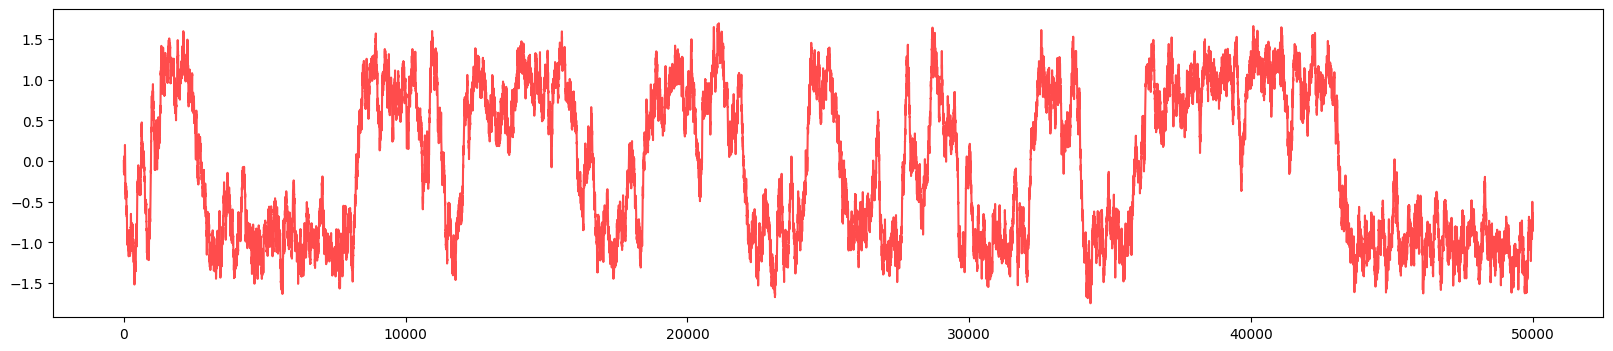

In [127]:
data = np.loadtxt("Langevin_1D.txt")
plt.figure(1, figsize=(20, 4))
plt.plot(np.arange(50000), data[0:50000], 'r', alpha=0.7) #Plots original data

In [128]:
"""
Function finds change points
  (Parameters) samples_per_bin: the number of samples per bin, data_count: how many data points we want to consider
and num_std: how many standard deviations the computed W2 distance must be from the mean to be a change point
  (Returns) list of time points where the change point occurs and list of indicies of the bin 
of detected change points
""""

def find_cp(samples_per_bin, data_count, num_std):
    BIN_COUNT = data_count / samples_per_bin
    bins = np.array_split(data[0:data_count], BIN_COUNT)
    indicies_CP = []
    change_points = []
    
    dw = [ot.emd2_1d(bins[i], bins[i + 1]) for i in range(len(bins)-1)] #Collect W2 distances between all bins
    mean_dw = np.mean(dw) #Avg W2 distance
    std_dw = np.std(dw) #Standard deviation of W2 distances
    #Consider change point when W2 distance is more than x standard deviations away from the mean
    for index, sample in enumerate(dw):
        if np.abs(sample - mean_dw) > num_std * std_dw:
            indicies_CP.append(index)
            change_points.append(index*samples_per_bin)
    
    return indicies_CP, change_points


In [130]:
BS = [50, 100, 200, 250, 500, 1000]
SD = np.arange(1,2.5,0.15)

fig, axs = plt.subplots(len(BS)*len(SD), figsize=(100,200))
ind = 0
for i in range(len(BS)):
    for j in range(len(SD)):
        cp_ind, cp = find_cp(BS[i], 50000, SD[j])
        val = np.full(len(cp_ind), -2)
        xs = ["Bin size: ", str(BS[i]), ", Standard Deviations: ", str(SD[j])]
        s = ''.join(xs)
        axs[ind].set_title(s)
        axs[ind].plot(np.arange(50000), data[0:50000], 'r', alpha=0.7) #Plots original data
        #label all change points detected
        axs[ind].plot(cp, val, 'x') 
        axs[ind].vlines(cp, -2, 2, linestyle='dashed')
        for k in range(len(cp)):
            axs[ind].annotate(cp_ind[k], (cp[k], -2))    
        ind+=1

plt.savefig('Labelled CP.png')
fig.clear()

<Figure size 10000x20000 with 0 Axes>